In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [3]:
train, test = keras.datasets.cifar10.load_data()

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE =[2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [6]:
results = {}
for bachSize in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bachSize, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(bachSize)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 123s 2ms/step - loss: 2.2369 - acc: 0.1645 - val_loss: 2.7001 - val_acc: 0.1774
Epoch 50/50
50000/50000 [==============================] - 123s 2ms/step - loss: 2.2379 - acc: 0.1651 - val_loss: 2.3788 - val_acc: 0.1885
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
________

50000/50000 [==============================] - 16s 319us/step - loss: 1.1137 - acc: 0.6066 - val_loss: 1.3359 - val_acc: 0.5376
Epoch 48/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.1059 - acc: 0.6075 - val_loss: 1.3472 - val_acc: 0.5312
Epoch 49/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.1083 - acc: 0.6075 - val_loss: 1.3945 - val_acc: 0.5149
Epoch 50/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.1008 - acc: 0.6083 - val_loss: 1.4159 - val_acc: 0.5159
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2

50000/50000 [==============================] - 8s 164us/step - loss: 0.8199 - acc: 0.7080 - val_loss: 1.5357 - val_acc: 0.5226
Epoch 46/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8160 - acc: 0.7085 - val_loss: 1.7137 - val_acc: 0.4805
Epoch 47/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8202 - acc: 0.7074 - val_loss: 1.6341 - val_acc: 0.4812
Epoch 48/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8077 - acc: 0.7121 - val_loss: 1.6122 - val_acc: 0.4936
Epoch 49/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8039 - acc: 0.7141 - val_loss: 1.6439 - val_acc: 0.4994
Epoch 50/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8050 - acc: 0.7135 - val_loss: 1.6419 - val_acc: 0.5031
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)     

Epoch 44/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3277 - acc: 0.8866 - val_loss: 2.2698 - val_acc: 0.4573
Epoch 45/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.3324 - acc: 0.8842 - val_loss: 2.4687 - val_acc: 0.4487
Epoch 46/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3098 - acc: 0.8955 - val_loss: 2.3048 - val_acc: 0.4608
Epoch 47/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3127 - acc: 0.8913 - val_loss: 2.3865 - val_acc: 0.4768
Epoch 48/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2943 - acc: 0.8982 - val_loss: 2.5215 - val_acc: 0.4574
Epoch 49/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2837 - acc: 0.9039 - val_loss: 2.5019 - val_acc: 0.4576
Epoch 50/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.2671 - acc: 0.9070 - val_loss: 2.4901 - val_acc: 0.4619
__________________________________

Epoch 43/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.2565 - acc: 0.9233 - val_loss: 2.3691 - val_acc: 0.4552
Epoch 44/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.2487 - acc: 0.9259 - val_loss: 2.3596 - val_acc: 0.4639
Epoch 45/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.2195 - acc: 0.9381 - val_loss: 2.2351 - val_acc: 0.4761
Epoch 46/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.2085 - acc: 0.9422 - val_loss: 2.3998 - val_acc: 0.4632
Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.1966 - acc: 0.9457 - val_loss: 2.3013 - val_acc: 0.4701
Epoch 48/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.1855 - acc: 0.9488 - val_loss: 2.4217 - val_acc: 0.4703
Epoch 49/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.1754 - acc: 0.9540 - val_loss: 2.4363 - val_acc: 0.4784
Epoch 50/50
50000/50000 [=========

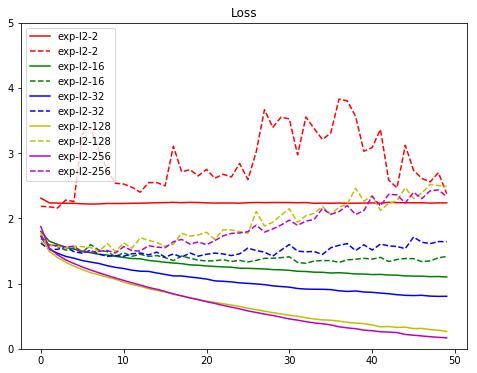

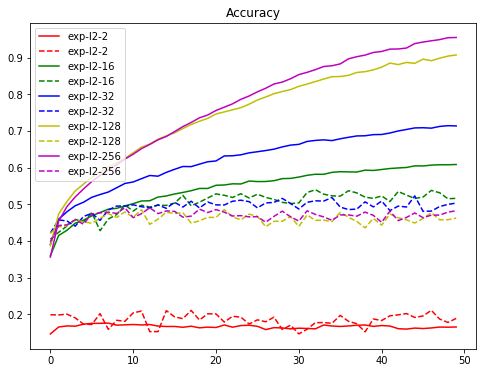

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()